In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, InputLayer
from keras.optimizers import Adadelta, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from config import *

In [32]:
df = pd.read_excel(filename_all)

df['Date']  = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

# Month
df['Month']  = df['Date'].dt.strftime('%m')
df['Month'] = df['Month'].apply(lambda x: int(x))

# Day
df['Day'] = df['Date'].dt.strftime('%d')
df['Day'] = df['Day'].apply(lambda x: int(x))

# Week
df['Week']  = df['Date'].dt.isocalendar().week
df['Week'] = df['Week'].apply(lambda x: int(x))

df['week_cos'] = np.cos(2 * np.pi * df['Week'] / 7)
df['week_sin'] = np.sin(2 * np.pi * df['Week'] / 7)

df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)

df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

In [33]:
df = df[['Day_Name', 'sixth']]

labelencoder = LabelEncoder()
df['Day_Name'] = labelencoder.fit_transform(df['Day_Name'])

ohe = OneHotEncoder()
ohe_df = pd.DataFrame(ohe.fit_transform(df[['Day_Name']]).toarray())
ohe_df.columns = ohe.get_feature_names()
ohe_df = ohe_df.astype(int)

df = df.join(ohe_df)

output = len(df['sixth'].unique())

In [34]:
X = df.drop(['sixth', 'Day_Name'], axis = 1)
y = df['sixth']
y = y.to_numpy()

scaler  = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = test_size, random_state = rand_state)

In [35]:
#def baseline_model():
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], )))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(125, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(output, activation='softmax'))

optimizer = Adadelta(learning_rate=0.001, rho = 0.95, epsilon = 1e-07)
    
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 4000, batch_size = 10, verbose = 1, validation_data = (X_test, y_test))

#prediction_test = model.predict(X_test)



    #return model

#estimator = KerasClassifier(build_fn=baseline_model, epochs=2000, batch_size=10, verbose=1)
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)


Epoch 1/4000
185/185 [==============================] - 1s 2ms/step - loss: 3.2943 - accuracy: 0.0528 - val_loss: 3.2817 - val_accuracy: 0.0491
Epoch 2/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.2860 - accuracy: 0.0522 - val_loss: 3.2809 - val_accuracy: 0.0491
Epoch 3/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.2910 - accuracy: 0.0528 - val_loss: 3.2802 - val_accuracy: 0.0491
Epoch 4/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.2882 - accuracy: 0.0425 - val_loss: 3.2794 - val_accuracy: 0.0491
Epoch 5/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.2910 - accuracy: 0.0448 - val_loss: 3.2787 - val_accuracy: 0.0491
Epoch 6/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.2958 - accuracy: 0.0443 - val_loss: 3.2779 - val_accuracy: 0.0491
Epoch 7/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.2933 - accuracy: 0.0467 - val_loss: 3.2772 - val_accuracy:

185/185 [==============================] - 0s 1ms/step - loss: 3.1984 - accuracy: 0.0856 - val_loss: 3.1914 - val_accuracy: 0.1534
Epoch 114/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.2019 - accuracy: 0.0717 - val_loss: 3.1906 - val_accuracy: 0.1534
Epoch 115/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.2102 - accuracy: 0.0883 - val_loss: 3.1898 - val_accuracy: 0.1534
Epoch 116/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1996 - accuracy: 0.0946 - val_loss: 3.1891 - val_accuracy: 0.1534
Epoch 117/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.2007 - accuracy: 0.0873 - val_loss: 3.1883 - val_accuracy: 0.1534
Epoch 118/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.1973 - accuracy: 0.0961 - val_loss: 3.1875 - val_accuracy: 0.1534
Epoch 119/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1981 - accuracy: 0.0970 - val_loss: 3.1867 - val_accuracy: 

Epoch 169/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1608 - accuracy: 0.0927 - val_loss: 3.1499 - val_accuracy: 0.1534
Epoch 170/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1516 - accuracy: 0.1206 - val_loss: 3.1492 - val_accuracy: 0.1534
Epoch 171/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1538 - accuracy: 0.0966 - val_loss: 3.1485 - val_accuracy: 0.1534
Epoch 172/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1558 - accuracy: 0.0931 - val_loss: 3.1478 - val_accuracy: 0.1534
Epoch 173/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1531 - accuracy: 0.1066 - val_loss: 3.1471 - val_accuracy: 0.1534
Epoch 174/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1587 - accuracy: 0.0897 - val_loss: 3.1464 - val_accuracy: 0.1534
Epoch 175/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1595 - accuracy: 0.0875 - val_loss: 3.1457 -

185/185 [==============================] - 0s 1ms/step - loss: 3.0849 - accuracy: 0.1229 - val_loss: 3.0763 - val_accuracy: 0.1534
Epoch 282/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0834 - accuracy: 0.1159 - val_loss: 3.0757 - val_accuracy: 0.1534
Epoch 283/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0785 - accuracy: 0.1097 - val_loss: 3.0751 - val_accuracy: 0.1534
Epoch 284/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0820 - accuracy: 0.1177 - val_loss: 3.0745 - val_accuracy: 0.1534
Epoch 285/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0877 - accuracy: 0.1084 - val_loss: 3.0739 - val_accuracy: 0.1534
Epoch 286/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0826 - accuracy: 0.1163 - val_loss: 3.0733 - val_accuracy: 0.1534
Epoch 287/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0843 - accuracy: 0.1120 - val_loss: 3.0727 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 3.0242 - accuracy: 0.1347 - val_loss: 3.0128 - val_accuracy: 0.1534
Epoch 394/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0194 - accuracy: 0.1221 - val_loss: 3.0123 - val_accuracy: 0.1534
Epoch 395/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0178 - accuracy: 0.1337 - val_loss: 3.0118 - val_accuracy: 0.1534
Epoch 396/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0149 - accuracy: 0.1114 - val_loss: 3.0112 - val_accuracy: 0.1534
Epoch 397/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0234 - accuracy: 0.1235 - val_loss: 3.0107 - val_accuracy: 0.1534
Epoch 398/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0251 - accuracy: 0.1061 - val_loss: 3.0102 - val_accuracy: 0.1534
Epoch 399/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0139 - accuracy: 0.1197 - val_loss: 3.0096 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 2.9692 - accuracy: 0.1218 - val_loss: 2.9576 - val_accuracy: 0.1534
Epoch 506/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9662 - accuracy: 0.1249 - val_loss: 2.9572 - val_accuracy: 0.1534
Epoch 507/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9574 - accuracy: 0.1290 - val_loss: 2.9567 - val_accuracy: 0.1534
Epoch 508/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9707 - accuracy: 0.1212 - val_loss: 2.9563 - val_accuracy: 0.1534
Epoch 509/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9709 - accuracy: 0.1207 - val_loss: 2.9558 - val_accuracy: 0.1534
Epoch 510/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9584 - accuracy: 0.1054 - val_loss: 2.9554 - val_accuracy: 0.1534
Epoch 511/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9591 - accuracy: 0.1202 - val_loss: 2.9549 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 2.9073 - accuracy: 0.1223 - val_loss: 2.9102 - val_accuracy: 0.1534
Epoch 618/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9065 - accuracy: 0.1349 - val_loss: 2.9098 - val_accuracy: 0.1534
Epoch 619/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9319 - accuracy: 0.1043 - val_loss: 2.9094 - val_accuracy: 0.1534
Epoch 620/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9293 - accuracy: 0.1255 - val_loss: 2.9090 - val_accuracy: 0.1534
Epoch 621/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9229 - accuracy: 0.1111 - val_loss: 2.9086 - val_accuracy: 0.1534
Epoch 622/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9118 - accuracy: 0.1365 - val_loss: 2.9082 - val_accuracy: 0.1534
Epoch 623/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9179 - accuracy: 0.1286 - val_loss: 2.9078 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 2.8788 - accuracy: 0.1187 - val_loss: 2.8703 - val_accuracy: 0.1534
Epoch 730/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8855 - accuracy: 0.1244 - val_loss: 2.8700 - val_accuracy: 0.1534
Epoch 731/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8833 - accuracy: 0.1386 - val_loss: 2.8697 - val_accuracy: 0.1534
Epoch 732/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8809 - accuracy: 0.1253 - val_loss: 2.8693 - val_accuracy: 0.1534
Epoch 733/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8874 - accuracy: 0.1359 - val_loss: 2.8690 - val_accuracy: 0.1534
Epoch 734/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8784 - accuracy: 0.1410 - val_loss: 2.8687 - val_accuracy: 0.1534
Epoch 735/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8694 - accuracy: 0.1191 - val_loss: 2.8684 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 2.8547 - accuracy: 0.1396 - val_loss: 2.8374 - val_accuracy: 0.1534
Epoch 842/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8335 - accuracy: 0.1440 - val_loss: 2.8372 - val_accuracy: 0.1534
Epoch 843/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8439 - accuracy: 0.1268 - val_loss: 2.8369 - val_accuracy: 0.1534
Epoch 844/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8457 - accuracy: 0.1520 - val_loss: 2.8366 - val_accuracy: 0.1534
Epoch 845/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8505 - accuracy: 0.1381 - val_loss: 2.8364 - val_accuracy: 0.1534
Epoch 846/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8407 - accuracy: 0.1339 - val_loss: 2.8361 - val_accuracy: 0.1534
Epoch 847/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8320 - accuracy: 0.1222 - val_loss: 2.8359 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 2.8447 - accuracy: 0.1143 - val_loss: 2.8110 - val_accuracy: 0.1380
Epoch 954/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8166 - accuracy: 0.1201 - val_loss: 2.8108 - val_accuracy: 0.1380
Epoch 955/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8209 - accuracy: 0.1383 - val_loss: 2.8106 - val_accuracy: 0.1380
Epoch 956/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8033 - accuracy: 0.1439 - val_loss: 2.8103 - val_accuracy: 0.1380
Epoch 957/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8217 - accuracy: 0.1334 - val_loss: 2.8101 - val_accuracy: 0.1380
Epoch 958/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8150 - accuracy: 0.1160 - val_loss: 2.8099 - val_accuracy: 0.1380
Epoch 959/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8153 - accuracy: 0.1465 - val_loss: 2.8097 - val_accuracy: 

Epoch 1009/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8089 - accuracy: 0.1393 - val_loss: 2.7998 - val_accuracy: 0.1442
Epoch 1010/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8088 - accuracy: 0.1544 - val_loss: 2.7996 - val_accuracy: 0.1442
Epoch 1011/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8169 - accuracy: 0.1373 - val_loss: 2.7994 - val_accuracy: 0.1442
Epoch 1012/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8010 - accuracy: 0.1477 - val_loss: 2.7992 - val_accuracy: 0.1442
Epoch 1013/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8180 - accuracy: 0.1341 - val_loss: 2.7990 - val_accuracy: 0.1442
Epoch 1014/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8163 - accuracy: 0.1370 - val_loss: 2.7988 - val_accuracy: 0.1442
Epoch 1015/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.8244 - accuracy: 0.1212 - val_loss: 2

Epoch 1120/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7821 - accuracy: 0.1219 - val_loss: 2.7813 - val_accuracy: 0.1442
Epoch 1121/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8095 - accuracy: 0.1166 - val_loss: 2.7812 - val_accuracy: 0.1442
Epoch 1122/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7977 - accuracy: 0.1274 - val_loss: 2.7810 - val_accuracy: 0.1442
Epoch 1123/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7952 - accuracy: 0.1557 - val_loss: 2.7809 - val_accuracy: 0.1442
Epoch 1124/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7871 - accuracy: 0.1322 - val_loss: 2.7808 - val_accuracy: 0.1442
Epoch 1125/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7945 - accuracy: 0.1392 - val_loss: 2.7806 - val_accuracy: 0.1442
Epoch 1126/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7824 - accuracy: 0.1351 - val_loss: 2

Epoch 1176/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7964 - accuracy: 0.1327 - val_loss: 2.7737 - val_accuracy: 0.1442
Epoch 1177/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7708 - accuracy: 0.1558 - val_loss: 2.7736 - val_accuracy: 0.1442
Epoch 1178/4000
185/185 [==============================] - ETA: 0s - loss: 2.7887 - accuracy: 0.14 - 0s 1ms/step - loss: 2.7884 - accuracy: 0.1451 - val_loss: 2.7734 - val_accuracy: 0.1442
Epoch 1179/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7808 - accuracy: 0.1253 - val_loss: 2.7733 - val_accuracy: 0.1442
Epoch 1180/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7854 - accuracy: 0.1299 - val_loss: 2.7732 - val_accuracy: 0.1442
Epoch 1181/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7878 - accuracy: 0.1510 - val_loss: 2.7731 - val_accuracy: 0.1442
Epoch 1182/4000
185/185 [==============================] - 0s 1ms/step - los

Epoch 1287/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7678 - accuracy: 0.1456 - val_loss: 2.7614 - val_accuracy: 0.1442
Epoch 1288/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7650 - accuracy: 0.1477 - val_loss: 2.7613 - val_accuracy: 0.1442
Epoch 1289/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7568 - accuracy: 0.1473 - val_loss: 2.7612 - val_accuracy: 0.1442
Epoch 1290/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7927 - accuracy: 0.1159 - val_loss: 2.7611 - val_accuracy: 0.1442
Epoch 1291/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7647 - accuracy: 0.1503 - val_loss: 2.7610 - val_accuracy: 0.1442
Epoch 1292/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7950 - accuracy: 0.1128 - val_loss: 2.7609 - val_accuracy: 0.1442
Epoch 1293/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7735 - accuracy: 0.1163 - val_loss: 2

Epoch 1343/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7643 - accuracy: 0.1357 - val_loss: 2.7564 - val_accuracy: 0.1442
Epoch 1344/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7823 - accuracy: 0.1336 - val_loss: 2.7564 - val_accuracy: 0.1442
Epoch 1345/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7617 - accuracy: 0.1333 - val_loss: 2.7563 - val_accuracy: 0.1442
Epoch 1346/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7775 - accuracy: 0.1266 - val_loss: 2.7562 - val_accuracy: 0.1442
Epoch 1347/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7652 - accuracy: 0.1381 - val_loss: 2.7561 - val_accuracy: 0.1442
Epoch 1348/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7791 - accuracy: 0.1280 - val_loss: 2.7560 - val_accuracy: 0.1442
Epoch 1349/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7884 - accuracy: 0.1394 - val_loss: 2

Epoch 1399/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7530 - accuracy: 0.1391 - val_loss: 2.7521 - val_accuracy: 0.1442
Epoch 1400/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7673 - accuracy: 0.1313 - val_loss: 2.7521 - val_accuracy: 0.1442
Epoch 1401/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7604 - accuracy: 0.1311 - val_loss: 2.7520 - val_accuracy: 0.1442
Epoch 1402/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7803 - accuracy: 0.1398 - val_loss: 2.7519 - val_accuracy: 0.1442
Epoch 1403/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7869 - accuracy: 0.1332 - val_loss: 2.7519 - val_accuracy: 0.1442
Epoch 1404/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7502 - accuracy: 0.1289 - val_loss: 2.7518 - val_accuracy: 0.1442
Epoch 1405/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7525 - accuracy: 0.1600 - val_loss: 2

Epoch 1455/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7645 - accuracy: 0.1325 - val_loss: 2.7484 - val_accuracy: 0.1319
Epoch 1456/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7640 - accuracy: 0.1246 - val_loss: 2.7484 - val_accuracy: 0.1319
Epoch 1457/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7435 - accuracy: 0.1534 - val_loss: 2.7483 - val_accuracy: 0.1319
Epoch 1458/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7697 - accuracy: 0.1284 - val_loss: 2.7482 - val_accuracy: 0.1319
Epoch 1459/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7430 - accuracy: 0.1435 - val_loss: 2.7482 - val_accuracy: 0.1319
Epoch 1460/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7808 - accuracy: 0.1381 - val_loss: 2.7481 - val_accuracy: 0.1319
Epoch 1461/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7525 - accuracy: 0.1375 - val_loss: 2

Epoch 1511/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7586 - accuracy: 0.1304 - val_loss: 2.7453 - val_accuracy: 0.1319
Epoch 1512/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7480 - accuracy: 0.1435 - val_loss: 2.7452 - val_accuracy: 0.1319
Epoch 1513/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7548 - accuracy: 0.1259 - val_loss: 2.7451 - val_accuracy: 0.1319
Epoch 1514/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7450 - accuracy: 0.1534 - val_loss: 2.7451 - val_accuracy: 0.1319
Epoch 1515/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7714 - accuracy: 0.1293 - val_loss: 2.7450 - val_accuracy: 0.1319
Epoch 1516/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7419 - accuracy: 0.1712 - val_loss: 2.7450 - val_accuracy: 0.1319
Epoch 1517/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7251 - accuracy: 0.1387 - val_loss: 2

Epoch 1567/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7745 - accuracy: 0.1542 - val_loss: 2.7425 - val_accuracy: 0.1319
Epoch 1568/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7588 - accuracy: 0.1189 - val_loss: 2.7425 - val_accuracy: 0.1319
Epoch 1569/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7950 - accuracy: 0.1232 - val_loss: 2.7424 - val_accuracy: 0.1319
Epoch 1570/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7855 - accuracy: 0.1426 - val_loss: 2.7424 - val_accuracy: 0.1319
Epoch 1571/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7199 - accuracy: 0.1536 - val_loss: 2.7424 - val_accuracy: 0.1319
Epoch 1572/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7550 - accuracy: 0.1326 - val_loss: 2.7423 - val_accuracy: 0.1319
Epoch 1573/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7795 - accuracy: 0.1280 - val_loss: 2

Epoch 1623/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7425 - accuracy: 0.1505 - val_loss: 2.7402 - val_accuracy: 0.1319
Epoch 1624/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7531 - accuracy: 0.1296 - val_loss: 2.7401 - val_accuracy: 0.1319
Epoch 1625/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7467 - accuracy: 0.1380 - val_loss: 2.7401 - val_accuracy: 0.1319
Epoch 1626/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7859 - accuracy: 0.1200 - val_loss: 2.7401 - val_accuracy: 0.1319
Epoch 1627/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7634 - accuracy: 0.1325 - val_loss: 2.7400 - val_accuracy: 0.1319
Epoch 1628/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7364 - accuracy: 0.1501 - val_loss: 2.7400 - val_accuracy: 0.1319
Epoch 1629/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7634 - accuracy: 0.1551 - val_loss: 2

Epoch 1679/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7357 - accuracy: 0.1437 - val_loss: 2.7382 - val_accuracy: 0.1319
Epoch 1680/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7663 - accuracy: 0.1149 - val_loss: 2.7381 - val_accuracy: 0.1319
Epoch 1681/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7438 - accuracy: 0.1365 - val_loss: 2.7381 - val_accuracy: 0.1319
Epoch 1682/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7458 - accuracy: 0.1368 - val_loss: 2.7381 - val_accuracy: 0.1319
Epoch 1683/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7348 - accuracy: 0.1408 - val_loss: 2.7380 - val_accuracy: 0.1319
Epoch 1684/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7320 - accuracy: 0.1390 - val_loss: 2.7380 - val_accuracy: 0.1319
Epoch 1685/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7351 - accuracy: 0.1494 - val_loss: 2

Epoch 1735/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7377 - accuracy: 0.1413 - val_loss: 2.7364 - val_accuracy: 0.1319
Epoch 1736/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7645 - accuracy: 0.1423 - val_loss: 2.7364 - val_accuracy: 0.1319
Epoch 1737/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7226 - accuracy: 0.1471 - val_loss: 2.7364 - val_accuracy: 0.1319
Epoch 1738/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7320 - accuracy: 0.1505 - val_loss: 2.7363 - val_accuracy: 0.1319
Epoch 1739/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7383 - accuracy: 0.1285 - val_loss: 2.7363 - val_accuracy: 0.1319
Epoch 1740/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7411 - accuracy: 0.1195 - val_loss: 2.7363 - val_accuracy: 0.1319
Epoch 1741/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7391 - accuracy: 0.1377 - val_loss: 2

Epoch 1791/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7509 - accuracy: 0.1352 - val_loss: 2.7349 - val_accuracy: 0.1319
Epoch 1792/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7563 - accuracy: 0.1370 - val_loss: 2.7349 - val_accuracy: 0.1319
Epoch 1793/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7627 - accuracy: 0.1216 - val_loss: 2.7349 - val_accuracy: 0.1319
Epoch 1794/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7447 - accuracy: 0.1450 - val_loss: 2.7348 - val_accuracy: 0.1319
Epoch 1795/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7448 - accuracy: 0.1494 - val_loss: 2.7348 - val_accuracy: 0.1319
Epoch 1796/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7172 - accuracy: 0.1519 - val_loss: 2.7348 - val_accuracy: 0.1319
Epoch 1797/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7511 - accuracy: 0.1247 - val_loss: 2

Epoch 1847/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7388 - accuracy: 0.1565 - val_loss: 2.7336 - val_accuracy: 0.1319
Epoch 1848/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7282 - accuracy: 0.1448 - val_loss: 2.7336 - val_accuracy: 0.1319
Epoch 1849/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7328 - accuracy: 0.1450 - val_loss: 2.7335 - val_accuracy: 0.1319
Epoch 1850/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7378 - accuracy: 0.1553 - val_loss: 2.7335 - val_accuracy: 0.1319
Epoch 1851/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7357 - accuracy: 0.1372 - val_loss: 2.7335 - val_accuracy: 0.1319
Epoch 1852/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7550 - accuracy: 0.1194 - val_loss: 2.7335 - val_accuracy: 0.1319
Epoch 1853/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7571 - accuracy: 0.1280 - val_loss: 2

Epoch 1903/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7424 - accuracy: 0.1415 - val_loss: 2.7325 - val_accuracy: 0.1319
Epoch 1904/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7431 - accuracy: 0.1284 - val_loss: 2.7324 - val_accuracy: 0.1319
Epoch 1905/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7552 - accuracy: 0.1288 - val_loss: 2.7324 - val_accuracy: 0.1319
Epoch 1906/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7371 - accuracy: 0.1317 - val_loss: 2.7324 - val_accuracy: 0.1319
Epoch 1907/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7692 - accuracy: 0.1469 - val_loss: 2.7324 - val_accuracy: 0.1319
Epoch 1908/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7458 - accuracy: 0.1469 - val_loss: 2.7324 - val_accuracy: 0.1319
Epoch 1909/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7422 - accuracy: 0.1217 - val_loss: 2

Epoch 1959/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7399 - accuracy: 0.1254 - val_loss: 2.7315 - val_accuracy: 0.1319
Epoch 1960/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7460 - accuracy: 0.1438 - val_loss: 2.7314 - val_accuracy: 0.1319
Epoch 1961/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7461 - accuracy: 0.1432 - val_loss: 2.7314 - val_accuracy: 0.1319
Epoch 1962/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7828 - accuracy: 0.1303 - val_loss: 2.7314 - val_accuracy: 0.1319
Epoch 1963/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7642 - accuracy: 0.1372 - val_loss: 2.7314 - val_accuracy: 0.1319
Epoch 1964/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7432 - accuracy: 0.1404 - val_loss: 2.7314 - val_accuracy: 0.1319
Epoch 1965/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7272 - accuracy: 0.1284 - val_loss: 2

Epoch 2015/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7290 - accuracy: 0.1650 - val_loss: 2.7306 - val_accuracy: 0.1319
Epoch 2016/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7428 - accuracy: 0.1402 - val_loss: 2.7306 - val_accuracy: 0.1319
Epoch 2017/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7534 - accuracy: 0.1235 - val_loss: 2.7306 - val_accuracy: 0.1319
Epoch 2018/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7183 - accuracy: 0.1252 - val_loss: 2.7305 - val_accuracy: 0.1319
Epoch 2019/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7209 - accuracy: 0.1463 - val_loss: 2.7305 - val_accuracy: 0.1319
Epoch 2020/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7458 - accuracy: 0.1517 - val_loss: 2.7305 - val_accuracy: 0.1319
Epoch 2021/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7576 - accuracy: 0.1306 - val_loss: 2

Epoch 2071/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7367 - accuracy: 0.1285 - val_loss: 2.7299 - val_accuracy: 0.1319
Epoch 2072/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7389 - accuracy: 0.1427 - val_loss: 2.7299 - val_accuracy: 0.1319
Epoch 2073/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7756 - accuracy: 0.1168 - val_loss: 2.7298 - val_accuracy: 0.1319
Epoch 2074/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7214 - accuracy: 0.1231 - val_loss: 2.7298 - val_accuracy: 0.1319
Epoch 2075/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7443 - accuracy: 0.1333 - val_loss: 2.7298 - val_accuracy: 0.1319
Epoch 2076/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7357 - accuracy: 0.1433 - val_loss: 2.7298 - val_accuracy: 0.1319
Epoch 2077/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7489 - accuracy: 0.1250 - val_loss: 2

Epoch 2127/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7452 - accuracy: 0.1309 - val_loss: 2.7292 - val_accuracy: 0.1319
Epoch 2128/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7512 - accuracy: 0.1350 - val_loss: 2.7292 - val_accuracy: 0.1319
Epoch 2129/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7030 - accuracy: 0.1397 - val_loss: 2.7292 - val_accuracy: 0.1319
Epoch 2130/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7353 - accuracy: 0.1382 - val_loss: 2.7292 - val_accuracy: 0.1319
Epoch 2131/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7197 - accuracy: 0.1354 - val_loss: 2.7292 - val_accuracy: 0.1319
Epoch 2132/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7364 - accuracy: 0.1489 - val_loss: 2.7292 - val_accuracy: 0.1319
Epoch 2133/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7264 - accuracy: 0.1331 - val_loss: 2

Epoch 2183/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7433 - accuracy: 0.1371 - val_loss: 2.7287 - val_accuracy: 0.1319
Epoch 2184/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7416 - accuracy: 0.1411 - val_loss: 2.7287 - val_accuracy: 0.1319
Epoch 2185/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7287 - accuracy: 0.1427 - val_loss: 2.7287 - val_accuracy: 0.1319
Epoch 2186/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7315 - accuracy: 0.1318 - val_loss: 2.7286 - val_accuracy: 0.1319
Epoch 2187/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7324 - accuracy: 0.1238 - val_loss: 2.7286 - val_accuracy: 0.1319
Epoch 2188/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7511 - accuracy: 0.1234 - val_loss: 2.7286 - val_accuracy: 0.1319
Epoch 2189/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7309 - accuracy: 0.1480 - val_loss: 2

Epoch 2239/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7468 - accuracy: 0.1415 - val_loss: 2.7282 - val_accuracy: 0.1319
Epoch 2240/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7489 - accuracy: 0.1550 - val_loss: 2.7282 - val_accuracy: 0.1319
Epoch 2241/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7524 - accuracy: 0.1541 - val_loss: 2.7282 - val_accuracy: 0.1319
Epoch 2242/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7315 - accuracy: 0.1382 - val_loss: 2.7282 - val_accuracy: 0.1319
Epoch 2243/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7596 - accuracy: 0.1486 - val_loss: 2.7281 - val_accuracy: 0.1319
Epoch 2244/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7518 - accuracy: 0.1439 - val_loss: 2.7281 - val_accuracy: 0.1319
Epoch 2245/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7548 - accuracy: 0.1419 - val_loss: 2

Epoch 2295/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7329 - accuracy: 0.1452 - val_loss: 2.7277 - val_accuracy: 0.1319
Epoch 2296/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7332 - accuracy: 0.1229 - val_loss: 2.7277 - val_accuracy: 0.1319
Epoch 2297/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7293 - accuracy: 0.1256 - val_loss: 2.7277 - val_accuracy: 0.1319
Epoch 2298/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7096 - accuracy: 0.1500 - val_loss: 2.7277 - val_accuracy: 0.1319
Epoch 2299/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7384 - accuracy: 0.1325 - val_loss: 2.7277 - val_accuracy: 0.1319
Epoch 2300/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7499 - accuracy: 0.1347 - val_loss: 2.7277 - val_accuracy: 0.1319
Epoch 2301/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7498 - accuracy: 0.1449 - val_loss: 2

Epoch 2351/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7271 - accuracy: 0.1453 - val_loss: 2.7274 - val_accuracy: 0.1319
Epoch 2352/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7258 - accuracy: 0.1529 - val_loss: 2.7274 - val_accuracy: 0.1319
Epoch 2353/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7377 - accuracy: 0.1267 - val_loss: 2.7274 - val_accuracy: 0.1319
Epoch 2354/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7526 - accuracy: 0.1312 - val_loss: 2.7273 - val_accuracy: 0.1319
Epoch 2355/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7565 - accuracy: 0.1404 - val_loss: 2.7273 - val_accuracy: 0.1319
Epoch 2356/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7130 - accuracy: 0.1446 - val_loss: 2.7273 - val_accuracy: 0.1319
Epoch 2357/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7723 - accuracy: 0.1264 - val_loss: 2

Epoch 2407/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7243 - accuracy: 0.1375 - val_loss: 2.7270 - val_accuracy: 0.1319
Epoch 2408/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7286 - accuracy: 0.1333 - val_loss: 2.7270 - val_accuracy: 0.1319
Epoch 2409/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7557 - accuracy: 0.1302 - val_loss: 2.7270 - val_accuracy: 0.1319
Epoch 2410/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7341 - accuracy: 0.1390 - val_loss: 2.7270 - val_accuracy: 0.1319
Epoch 2411/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7366 - accuracy: 0.1398 - val_loss: 2.7270 - val_accuracy: 0.1319
Epoch 2412/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7287 - accuracy: 0.1340 - val_loss: 2.7270 - val_accuracy: 0.1319
Epoch 2413/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7541 - accuracy: 0.1222 - val_loss: 2

Epoch 2463/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7122 - accuracy: 0.1688 - val_loss: 2.7267 - val_accuracy: 0.1319
Epoch 2464/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7413 - accuracy: 0.1479 - val_loss: 2.7267 - val_accuracy: 0.1319
Epoch 2465/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7680 - accuracy: 0.1303 - val_loss: 2.7267 - val_accuracy: 0.1319
Epoch 2466/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7344 - accuracy: 0.1321 - val_loss: 2.7267 - val_accuracy: 0.1319
Epoch 2467/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7590 - accuracy: 0.1295 - val_loss: 2.7267 - val_accuracy: 0.1319
Epoch 2468/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7524 - accuracy: 0.1336 - val_loss: 2.7267 - val_accuracy: 0.1319
Epoch 2469/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7092 - accuracy: 0.1297 - val_loss: 2

Epoch 2519/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7645 - accuracy: 0.1302 - val_loss: 2.7265 - val_accuracy: 0.1319
Epoch 2520/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7212 - accuracy: 0.1348 - val_loss: 2.7265 - val_accuracy: 0.1319
Epoch 2521/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7516 - accuracy: 0.1283 - val_loss: 2.7265 - val_accuracy: 0.1319
Epoch 2522/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7336 - accuracy: 0.1416 - val_loss: 2.7265 - val_accuracy: 0.1319
Epoch 2523/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7510 - accuracy: 0.1232 - val_loss: 2.7265 - val_accuracy: 0.1319
Epoch 2524/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7345 - accuracy: 0.1301 - val_loss: 2.7265 - val_accuracy: 0.1319
Epoch 2525/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7212 - accuracy: 0.1321 - val_loss: 2

Epoch 2575/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7647 - accuracy: 0.1311 - val_loss: 2.7263 - val_accuracy: 0.1319
Epoch 2576/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7459 - accuracy: 0.1303 - val_loss: 2.7263 - val_accuracy: 0.1319
Epoch 2577/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7470 - accuracy: 0.1317 - val_loss: 2.7263 - val_accuracy: 0.1319
Epoch 2578/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7317 - accuracy: 0.1404 - val_loss: 2.7263 - val_accuracy: 0.1319
Epoch 2579/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7242 - accuracy: 0.1358 - val_loss: 2.7263 - val_accuracy: 0.1319
Epoch 2580/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7526 - accuracy: 0.1222 - val_loss: 2.7263 - val_accuracy: 0.1319
Epoch 2581/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7555 - accuracy: 0.1334 - val_loss: 2

Epoch 2631/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7364 - accuracy: 0.1398 - val_loss: 2.7262 - val_accuracy: 0.1319
Epoch 2632/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7307 - accuracy: 0.1300 - val_loss: 2.7261 - val_accuracy: 0.1319
Epoch 2633/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7331 - accuracy: 0.1211 - val_loss: 2.7261 - val_accuracy: 0.1319
Epoch 2634/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7475 - accuracy: 0.1374 - val_loss: 2.7261 - val_accuracy: 0.1319
Epoch 2635/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7431 - accuracy: 0.1293 - val_loss: 2.7261 - val_accuracy: 0.1319
Epoch 2636/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7414 - accuracy: 0.1281 - val_loss: 2.7261 - val_accuracy: 0.1319
Epoch 2637/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7242 - accuracy: 0.1383 - val_loss: 2

Epoch 2687/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7447 - accuracy: 0.1486 - val_loss: 2.7260 - val_accuracy: 0.1319
Epoch 2688/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7319 - accuracy: 0.1209 - val_loss: 2.7260 - val_accuracy: 0.1319
Epoch 2689/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7463 - accuracy: 0.1408 - val_loss: 2.7260 - val_accuracy: 0.1319
Epoch 2690/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7143 - accuracy: 0.1352 - val_loss: 2.7260 - val_accuracy: 0.1319
Epoch 2691/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7159 - accuracy: 0.1450 - val_loss: 2.7260 - val_accuracy: 0.1319
Epoch 2692/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7262 - accuracy: 0.1419 - val_loss: 2.7260 - val_accuracy: 0.1319
Epoch 2693/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7011 - accuracy: 0.1646 - val_loss: 2

Epoch 2743/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7333 - accuracy: 0.1260 - val_loss: 2.7259 - val_accuracy: 0.1319
Epoch 2744/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7176 - accuracy: 0.1439 - val_loss: 2.7259 - val_accuracy: 0.1319
Epoch 2745/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7256 - accuracy: 0.1597 - val_loss: 2.7259 - val_accuracy: 0.1319
Epoch 2746/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6965 - accuracy: 0.1478 - val_loss: 2.7259 - val_accuracy: 0.1319
Epoch 2747/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7426 - accuracy: 0.1238 - val_loss: 2.7259 - val_accuracy: 0.1319
Epoch 2748/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7411 - accuracy: 0.1284 - val_loss: 2.7259 - val_accuracy: 0.1319
Epoch 2749/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7148 - accuracy: 0.1459 - val_loss: 2

Epoch 2799/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7315 - accuracy: 0.1311 - val_loss: 2.7258 - val_accuracy: 0.1319
Epoch 2800/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7329 - accuracy: 0.1455 - val_loss: 2.7258 - val_accuracy: 0.1319
Epoch 2801/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7061 - accuracy: 0.1583 - val_loss: 2.7258 - val_accuracy: 0.1319
Epoch 2802/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7567 - accuracy: 0.1499 - val_loss: 2.7258 - val_accuracy: 0.1319
Epoch 2803/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7340 - accuracy: 0.1329 - val_loss: 2.7258 - val_accuracy: 0.1319
Epoch 2804/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7556 - accuracy: 0.1435 - val_loss: 2.7258 - val_accuracy: 0.1319
Epoch 2805/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7111 - accuracy: 0.1346 - val_loss: 2

Epoch 2910/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.6998 - accuracy: 0.1575 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 2911/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7161 - accuracy: 0.1259 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 2912/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7063 - accuracy: 0.1312 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 2913/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7047 - accuracy: 0.1551 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 2914/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7612 - accuracy: 0.1330 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 2915/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7713 - accuracy: 0.1178 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 2916/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7281 - accuracy: 0.1293 - val_loss: 2

Epoch 2966/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6864 - accuracy: 0.1461 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 2967/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7115 - accuracy: 0.1390 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 2968/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7216 - accuracy: 0.1439 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 2969/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7296 - accuracy: 0.1444 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 2970/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7455 - accuracy: 0.1400 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 2971/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7002 - accuracy: 0.1294 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 2972/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7166 - accuracy: 0.1367 - val_loss: 2

Epoch 3022/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7444 - accuracy: 0.1265 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3023/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7608 - accuracy: 0.1353 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3024/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7313 - accuracy: 0.1416 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3025/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7276 - accuracy: 0.1153 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3026/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7542 - accuracy: 0.1390 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3027/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7203 - accuracy: 0.1299 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3028/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7314 - accuracy: 0.1378 - val_loss: 2

Epoch 3078/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7217 - accuracy: 0.1459 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3079/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7425 - accuracy: 0.1262 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3080/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6918 - accuracy: 0.1366 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3081/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7157 - accuracy: 0.1356 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3082/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7018 - accuracy: 0.1316 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3083/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7337 - accuracy: 0.1437 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3084/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7254 - accuracy: 0.1461 - val_loss: 2

Epoch 3134/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7399 - accuracy: 0.1410 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3135/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7259 - accuracy: 0.1231 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3136/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7162 - accuracy: 0.1364 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3137/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7577 - accuracy: 0.1250 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3138/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7218 - accuracy: 0.1526 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3139/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7311 - accuracy: 0.1305 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3140/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7252 - accuracy: 0.1446 - val_loss: 2

Epoch 3190/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7312 - accuracy: 0.1364 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3191/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7171 - accuracy: 0.1459 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3192/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7231 - accuracy: 0.1316 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3193/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7744 - accuracy: 0.1290 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3194/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7424 - accuracy: 0.1520 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3195/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7550 - accuracy: 0.1304 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3196/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7635 - accuracy: 0.1113 - val_loss: 2

Epoch 3246/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7260 - accuracy: 0.1440 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3247/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7064 - accuracy: 0.1371 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3248/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7300 - accuracy: 0.1408 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3249/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7144 - accuracy: 0.1412 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3250/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7299 - accuracy: 0.1317 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3251/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7347 - accuracy: 0.1387 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3252/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7273 - accuracy: 0.1456 - val_loss: 2

Epoch 3302/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6917 - accuracy: 0.1541 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3303/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7232 - accuracy: 0.1427 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3304/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7577 - accuracy: 0.1314 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3305/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7311 - accuracy: 0.1353 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3306/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7454 - accuracy: 0.1432 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3307/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7552 - accuracy: 0.1390 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3308/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7548 - accuracy: 0.1442 - val_loss: 2

Epoch 3358/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6974 - accuracy: 0.1484 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3359/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7388 - accuracy: 0.1326 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3360/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7389 - accuracy: 0.1365 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3361/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7102 - accuracy: 0.1336 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3362/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7167 - accuracy: 0.1475 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3363/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6779 - accuracy: 0.1503 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3364/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7275 - accuracy: 0.1441 - val_loss: 2

Epoch 3414/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7188 - accuracy: 0.1532 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3415/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7331 - accuracy: 0.1352 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3416/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7451 - accuracy: 0.1455 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3417/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7149 - accuracy: 0.1529 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3418/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7383 - accuracy: 0.1316 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3419/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7291 - accuracy: 0.1480 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3420/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7397 - accuracy: 0.1369 - val_loss: 2

Epoch 3470/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7331 - accuracy: 0.1417 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3471/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7285 - accuracy: 0.1312 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3472/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7408 - accuracy: 0.1386 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3473/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7153 - accuracy: 0.1561 - val_loss: 2.7254 - val_accuracy: 0.1319
Epoch 3474/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7535 - accuracy: 0.1349 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3475/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7307 - accuracy: 0.1208 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3476/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7405 - accuracy: 0.1535 - val_loss: 2

Epoch 3526/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7383 - accuracy: 0.1158 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3527/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7781 - accuracy: 0.1316 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3528/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7110 - accuracy: 0.1467 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3529/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7349 - accuracy: 0.1261 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3530/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7334 - accuracy: 0.1562 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3531/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7309 - accuracy: 0.1257 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3532/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7929 - accuracy: 0.1156 - val_loss: 2

Epoch 3582/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7251 - accuracy: 0.1399 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3583/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7342 - accuracy: 0.1396 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3584/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7451 - accuracy: 0.1416 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3585/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7090 - accuracy: 0.1490 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3586/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7468 - accuracy: 0.1192 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3587/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7248 - accuracy: 0.1408 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3588/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7363 - accuracy: 0.1289 - val_loss: 2

Epoch 3638/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7498 - accuracy: 0.1450 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3639/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7476 - accuracy: 0.1301 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3640/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7550 - accuracy: 0.1256 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3641/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7452 - accuracy: 0.1164 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3642/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6859 - accuracy: 0.1256 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3643/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7262 - accuracy: 0.1373 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3644/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7380 - accuracy: 0.1367 - val_loss: 2

Epoch 3694/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7357 - accuracy: 0.1334 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3695/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7078 - accuracy: 0.1478 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3696/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7534 - accuracy: 0.1348 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3697/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7301 - accuracy: 0.1267 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3698/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7224 - accuracy: 0.1441 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3699/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7459 - accuracy: 0.1348 - val_loss: 2.7255 - val_accuracy: 0.1319
Epoch 3700/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6941 - accuracy: 0.1470 - val_loss: 2

Epoch 3805/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7277 - accuracy: 0.1339 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 3806/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6991 - accuracy: 0.1443 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 3807/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7645 - accuracy: 0.1226 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 3808/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7555 - accuracy: 0.1251 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 3809/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7132 - accuracy: 0.1609 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 3810/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7113 - accuracy: 0.1400 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 3811/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7316 - accuracy: 0.1403 - val_loss: 2

Epoch 3861/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7445 - accuracy: 0.1317 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 3862/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7627 - accuracy: 0.1258 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 3863/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7376 - accuracy: 0.1465 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 3864/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7334 - accuracy: 0.1319 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 3865/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7624 - accuracy: 0.1355 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 3866/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7189 - accuracy: 0.1473 - val_loss: 2.7256 - val_accuracy: 0.1319
Epoch 3867/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7290 - accuracy: 0.1298 - val_loss: 2

Epoch 3917/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7261 - accuracy: 0.1381 - val_loss: 2.7257 - val_accuracy: 0.1319
Epoch 3918/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7258 - accuracy: 0.1417 - val_loss: 2.7257 - val_accuracy: 0.1319
Epoch 3919/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7254 - accuracy: 0.1367 - val_loss: 2.7257 - val_accuracy: 0.1319
Epoch 3920/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7134 - accuracy: 0.1419 - val_loss: 2.7257 - val_accuracy: 0.1319
Epoch 3921/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7284 - accuracy: 0.1366 - val_loss: 2.7257 - val_accuracy: 0.1319
Epoch 3922/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7406 - accuracy: 0.1219 - val_loss: 2.7257 - val_accuracy: 0.1319
Epoch 3923/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7187 - accuracy: 0.1250 - val_loss: 2

In [37]:
scores = model.evaluate(X_test, y_test, batch_size = 10)

33/33 [==============================] - 0s 2ms/step - loss: 2.7258 - accuracy: 0.1319


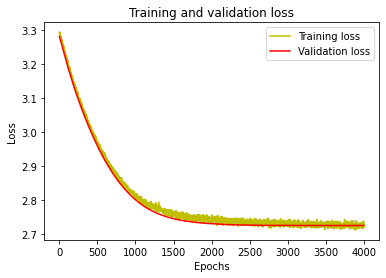

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

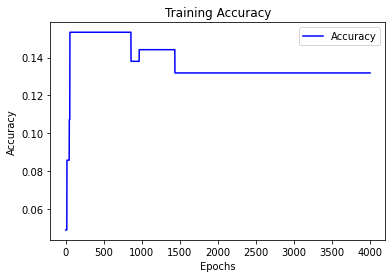

In [39]:
val_acc = history.history['val_accuracy']
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, val_acc, 'b', label = 'Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
input_date = datetime.strptime('04/15/2021', '%m/%d/%Y')
input_week = int(input_date.strftime("%W"))
input_day_name = input_date.strftime("%A")
input_week_cos = np.cos(2 * np.pi * input_week / 7)
input_week_sin = np.sin(2 * np.pi * input_week / 7)

input_data = []
#input_data.append(input_week_cos)
#input_data.append(input_week_sin)
input_data.append(input_day_name)

unseen = pd.DataFrame([input_data], columns = ['Day_Name'])

In [41]:
day_str = unseen['Day_Name']
day_str

0    Thursday
Name: Day_Name, dtype: object

In [42]:
input_df = pd.DataFrame(ohe.transform(labelencoder.transform(day_str.ravel()).reshape(-1,1)).toarray().astype(int))
unseen = unseen.join(input_df)

In [43]:
unseen = unseen.drop('Day_Name', axis = 1)

In [44]:
unseen_X = scaler.transform(unseen[unseen.columns[:]])

In [45]:
unseen

,0,1,2,3
0,0,1,0,0


In [47]:
pred = np.argmax(model.predict(unseen_X), axis=None)

In [48]:
pred

26

In [21]:
argss = np.argmax(model.predict(X_test[8:9]), axis = None)

In [23]:
y_test[8:9]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
encoder.inverse_transform([pred])

array([42], dtype=int64)

In [25]:
argss

0

In [50]:
encoder.classes_

array([15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

In [53]:
model._name = "SIXTH"

In [55]:
model.save('C:\Personal_Project\Lotto_Analysis\Model')

INFO:tensorflow:Assets written to: C:\Personal_Project\Lotto_Analysis\Model\assets
